In [147]:
import numpy as np
import pandas as pd
import nltk

import wordcloud
  
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
plt.style.use('dark_background')

# Loading word embedding computed a pre-trained model and stop words for English

In [2]:
data = np.load('sentences_embedding/word_embedding.npy')
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(44996, 200)


In [3]:
pca = PCA(n_components=10)
data_pca = pca.fit_transform(data)

In [4]:
print(type(data_pca))
print(data_pca.shape)
print(len(data_pca[0]))

<class 'numpy.ndarray'>
(44996, 10)
10


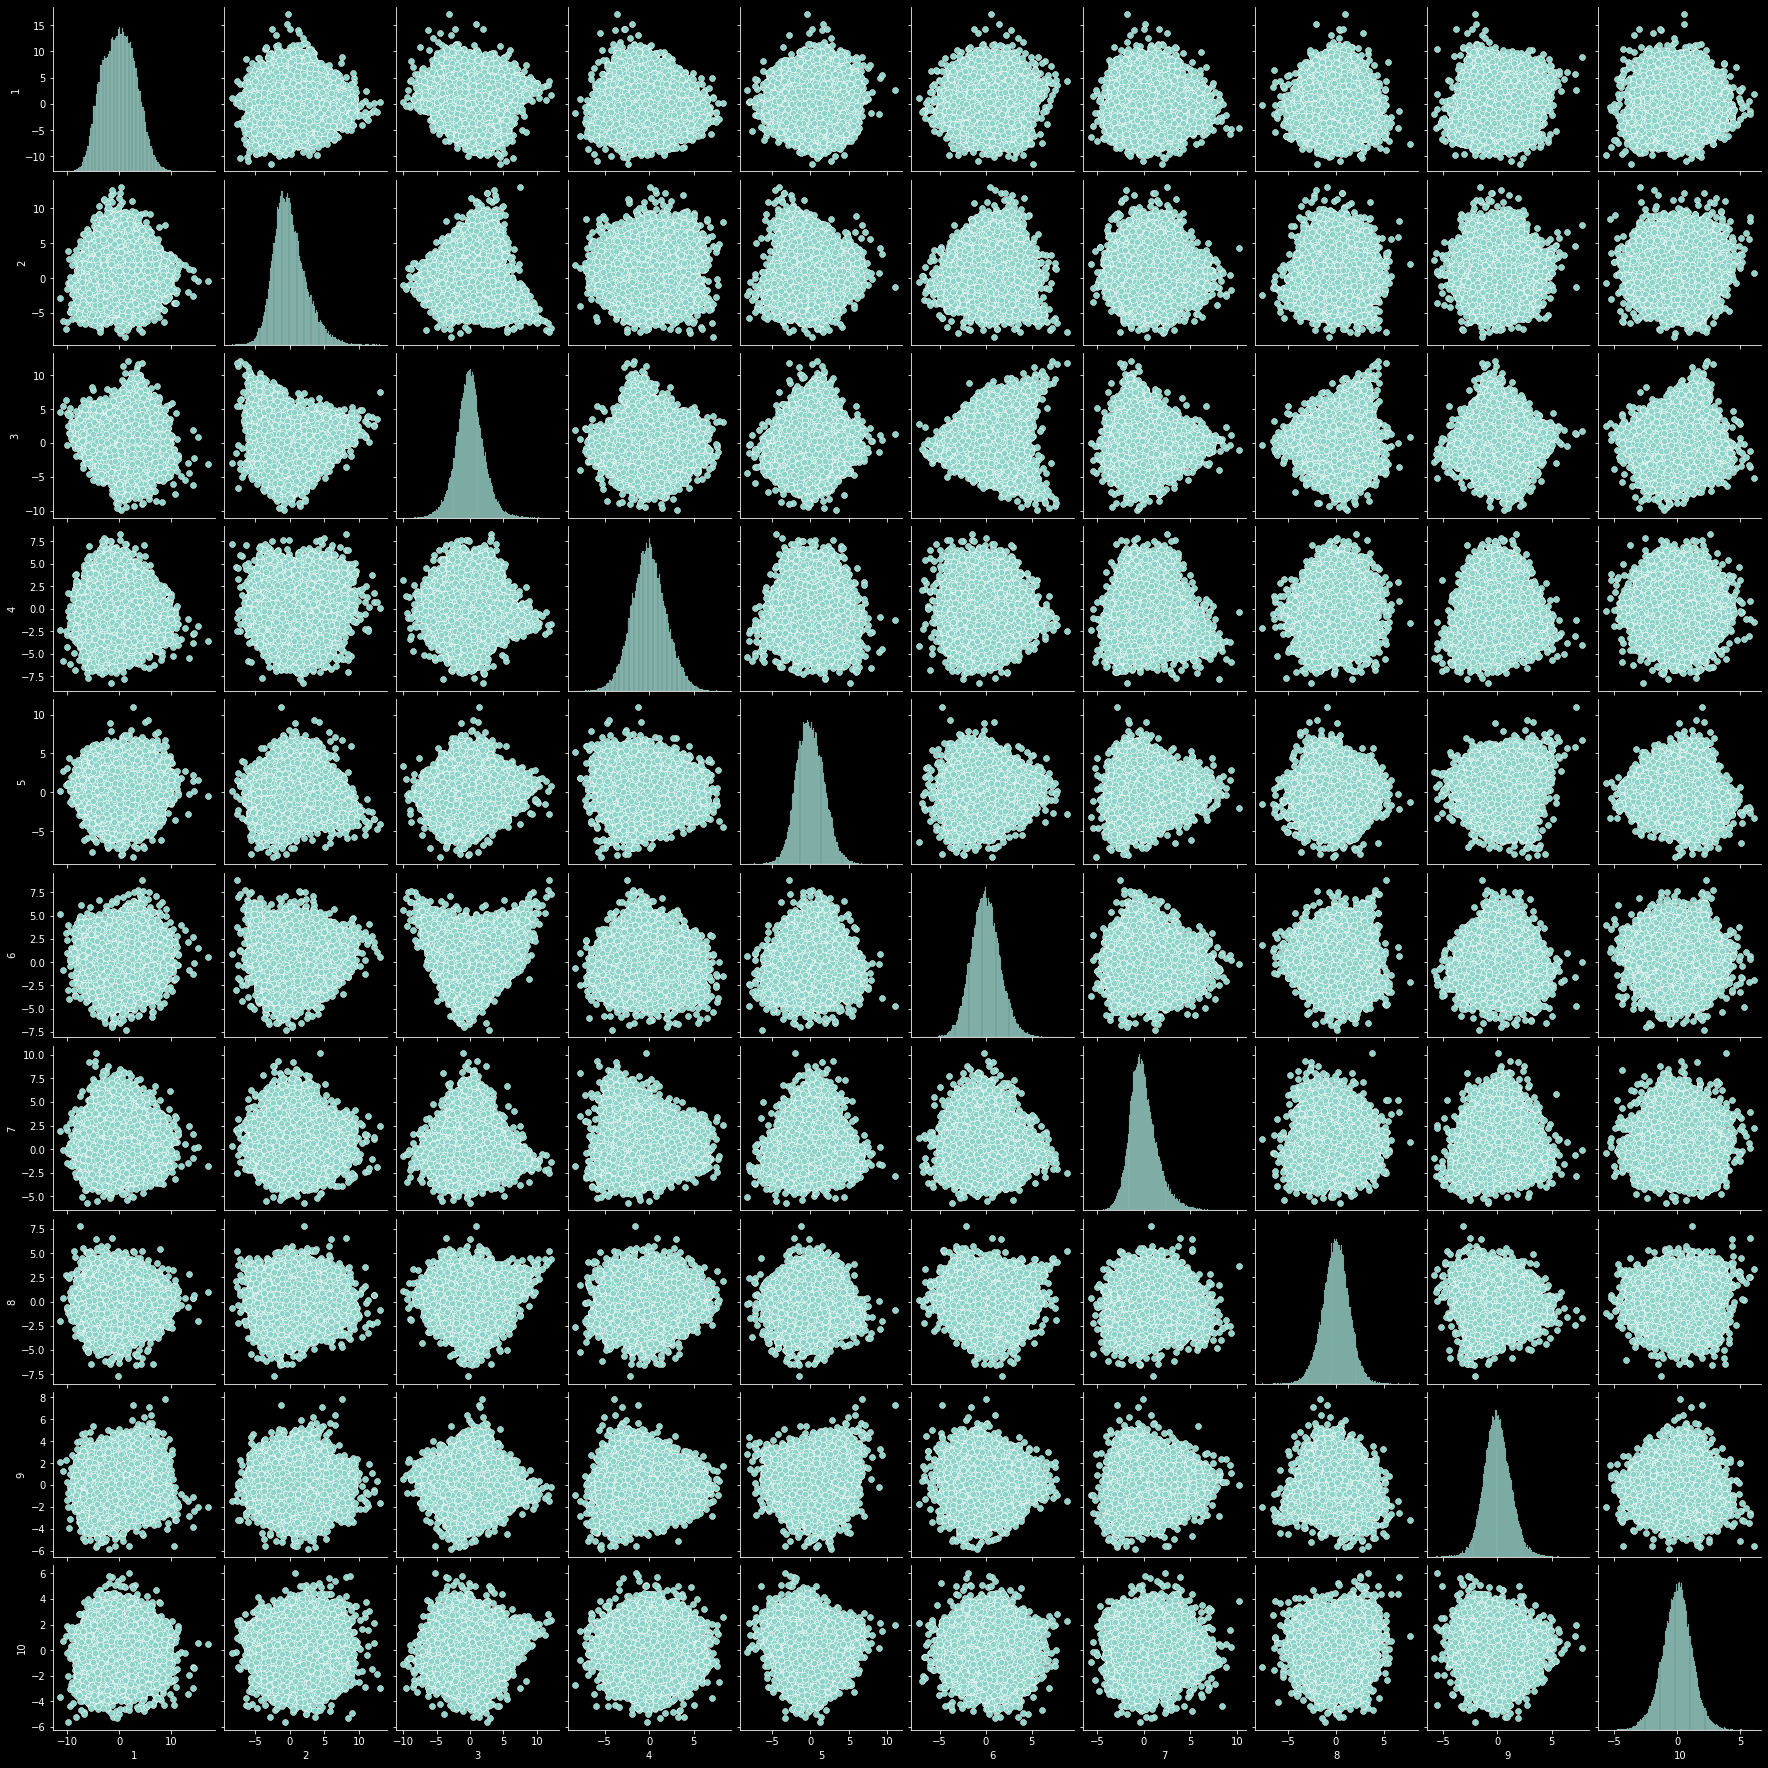

In [5]:
columns = [str(i+1) for i in range(len(data_pca[0]))] #Name of columns: '1', '2', '3', etc
data_frame = pd.DataFrame(data_pca)
data_frame.columns = columns
sns.pairplot(data_frame)

## The Elbow method to determine the optimal number of clusters

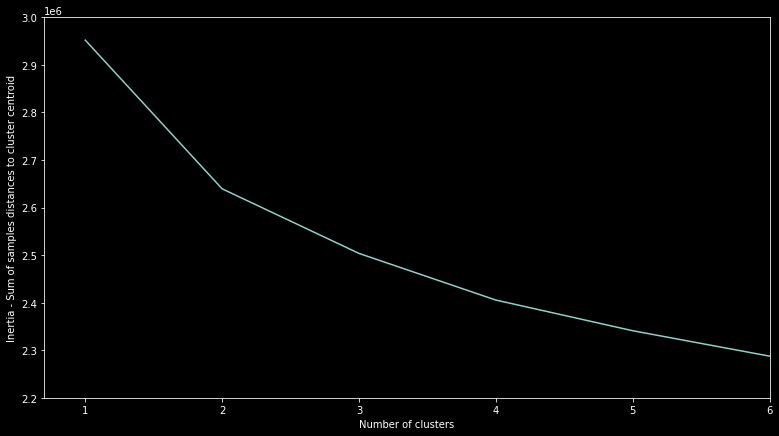

In [169]:
sse = {}
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    
plt.figure(figsize=(13,7))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlim(0.7,6)
plt.ylim(2.2e6,3e6)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia - Sum of samples distances to cluster centroid") #Inertia: Sum of distances of samples to their closest cluster center
plt.show()

In [170]:
kmeans5 = KMeans(n_clusters = 2, random_state =0).fit(data)
clusters5 = kmeans5.labels_ # list with one value per text corresponding to the cluster label

kmeans10 = KMeans(n_clusters = 3, random_state =0).fit(data)
clusters10 = kmeans10.labels_

kmeans15 = KMeans(n_clusters = 4, random_state =0).fit(data)
clusters15 = kmeans15.labels_

kmeans20 = KMeans(n_clusters = 5, random_state =0).fit(data)
clusters20 = kmeans20.labels_

In [ ]:
## PCA EXPLANATION VARIANCE

In [9]:
xpl = pca.explained_variance_ratio_  #Porcentage of the data described by the corresponding vector
print(xpl[:5]) #Porcentage of data described by each of the first 5 vectors
print(np.sum(xpl)) #Total porcentage of data describe by all the vector components

[0.15668371 0.08476923 0.0686925  0.05748017 0.04954416]
0.5679771


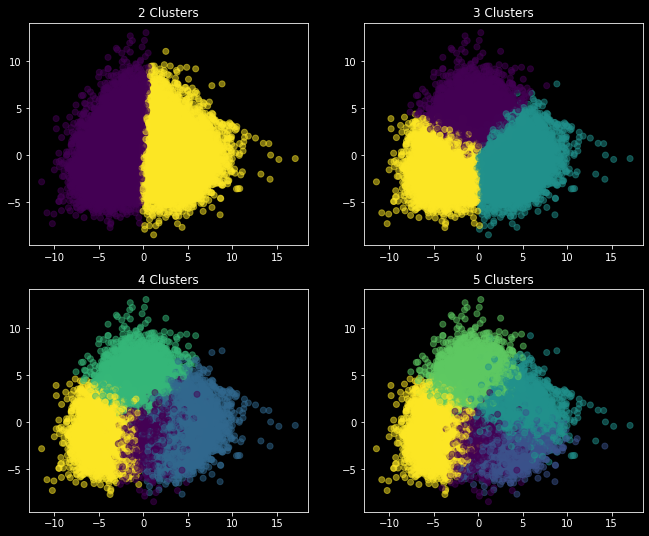

In [171]:
# Exploring with different numbers of clusters
plt.figure(figsize=(11,9))

plt.subplot(2,2,1)
plt.title('2 Clusters')
plt.scatter(data_pca[:,0], data_pca[:,1], c=clusters5, alpha=0.5)

plt.subplot(2,2,2)
plt.title('3 Clusters')
plt.scatter(data_pca[:,0], data_pca[:,1], c=clusters10, alpha=0.5)

plt.subplot(2,2,3)
plt.title('4 Clusters')
plt.scatter(data_pca[:,0], data_pca[:,1], c=clusters15, alpha=0.5)

plt.subplot(2,2,4)
plt.title('5 Clusters')
plt.scatter(data_pca[:,0], data_pca[:,1], c=clusters20, alpha=0.5)

plt.show()

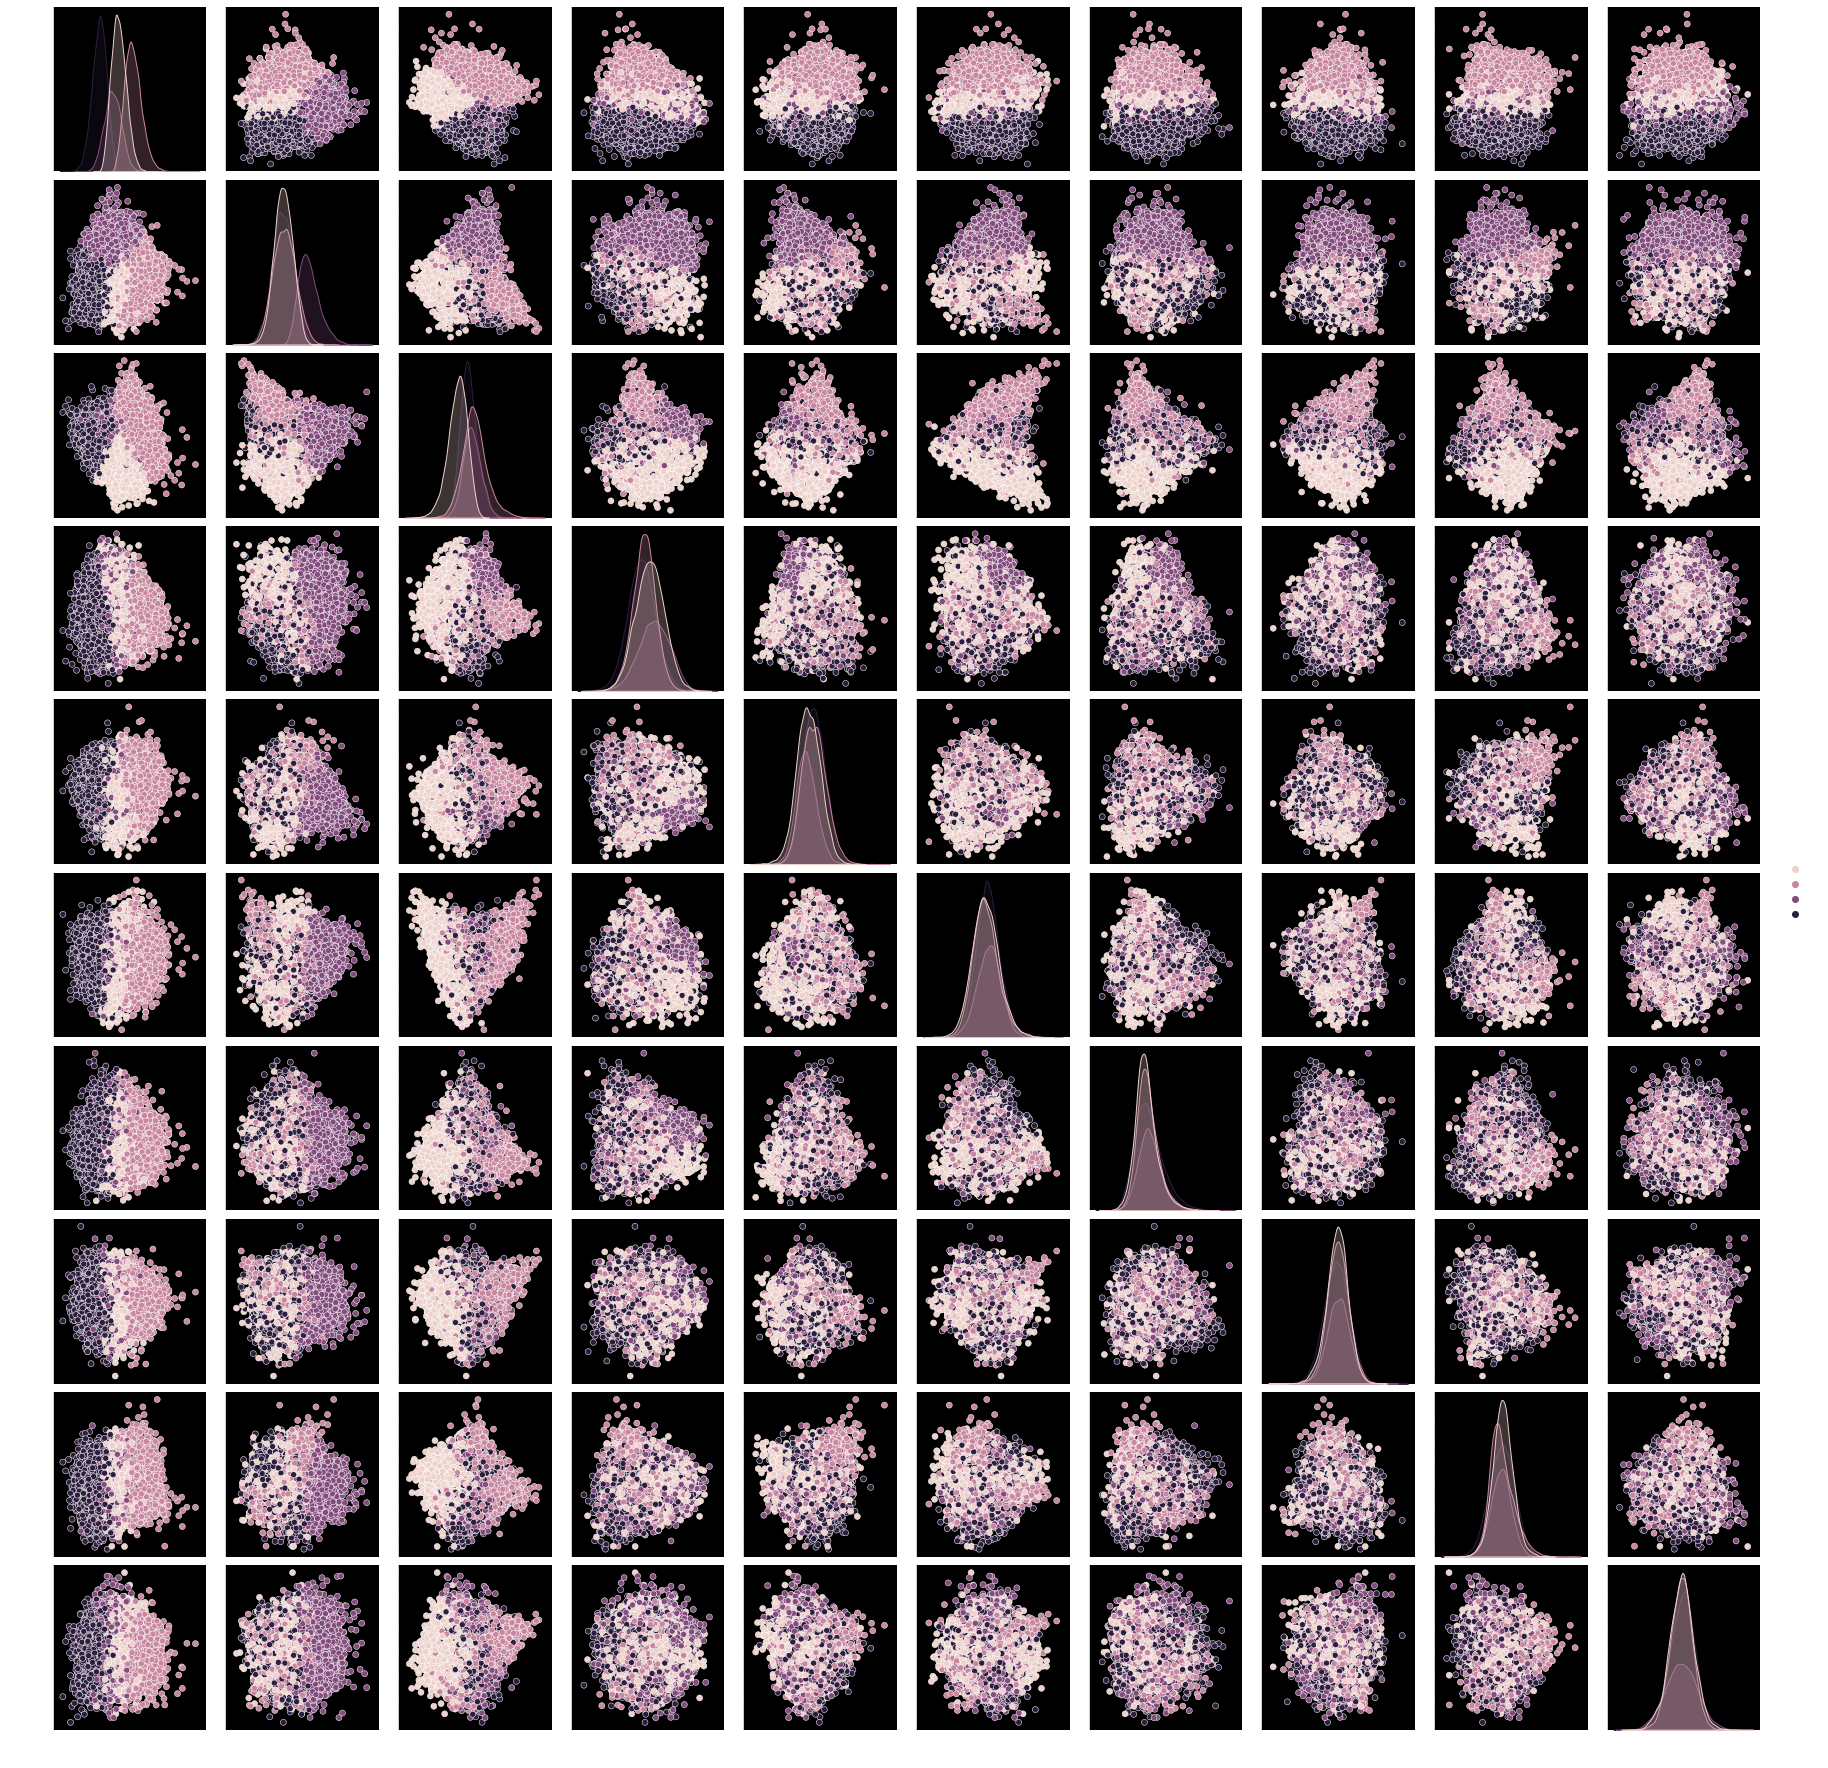

In [172]:
data_frame['c'] = clusters15
%matplotlib inline
sns.pairplot(data_frame, hue = 'c')

<IPython.core.display.Javascript object>


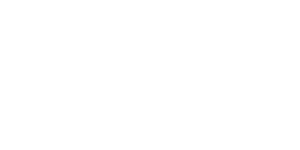

Text(0.5, 0, 'Third')

<IPython.core.display.Javascript object>


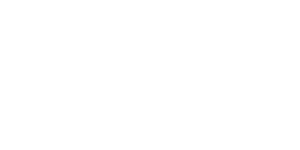

In [173]:
#3d plot of the 3 main components
%matplotlib notebook
fig = plt.figure(figsize=(5,5))

ax = fig.add_subplot(projection='3d')
ax.scatter(data_pca[:,0], data_pca[:,1], data_pca[:,2], c=clusters10)

ax.set_xlabel('First')
ax.set_ylabel('Second')
ax.set_zlabel('Third')

#plt.show()

In [174]:
#Getting the text indices for each cluster:
k = 4 # Number clusters
indices = []*k
for i in range(k): indices.append([])
    
for j in range(len(clusters15)):
    indices[clusters15[j]].append(j)

In [175]:
np.save('data/indices0_english.npy', indices[0])
np.save('data/indices1_english.npy', indices[1])
np.save('data/indices2_english.npy', indices[2])
np.save('data/indices3_english.npy', indices[3])

In [ ]:
## Do the same for stop word with programming words

In [61]:
clean_datatext = pd.read_csv('data/clean_train_data.csv')
print(shape(clean_datatext))

In [122]:
text_per_cluster = []*k
for i in range(k): text_per_cluster.append([])
for i in range(k):
    text_per_cluster
    
#clean_datatext(indices[0])
body_0 = clean_datatext['Body'][indices[0]]
body_1 = clean_datatext['Body'][indices[1]]
body_2 = clean_datatext['Body'][indices[2]]
body_3 = clean_datatext['Body'][indices[3]]
body_4 = clean_datatext['Body'][indices[4]]

#print(type(body_0))
#print(type(body_2))
print(type(body_0.values))
print(type(body_2.values))
print(body_0.values[0])
print(len(body_2.values))

#print(len(body_0))
#print(body_0.values)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
id like to understand why java 8 optionals were designed to be immutable is it just for thread safety 
9063


In [132]:
# Run only one time per run
#nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [134]:
program_list = ['use', 'code', 'error', 'function', 'int', 'value', 'get', 'return']
stopwords = stopwords + program_list
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

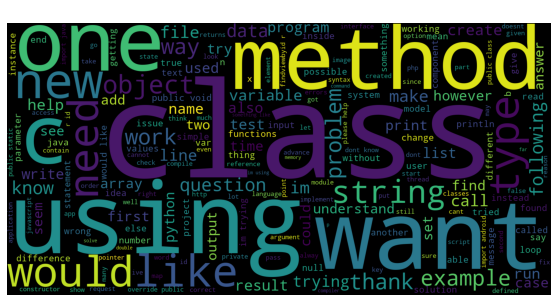

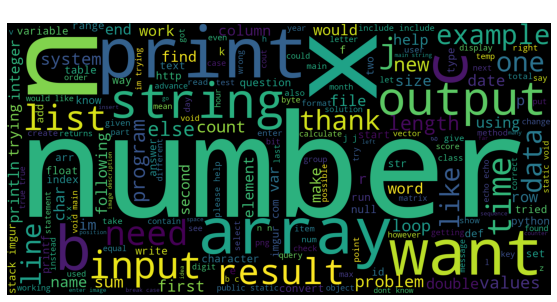

TypeError: sequence item 4874: expected str instance, float found

In [135]:
#Cluster 0
%matplotlib inline
#nltk.download('stopwords')

corpus = " ".join(body_0.values)
wc = wordcloud.WordCloud(width=1600, height=800, stopwords=stopwords).generate(corpus)

plt.figure(figsize=(10,5))
plt.title('Cluster 0')
plt.imshow(wc)
plt.axis("off")
plt.show()

corpus = " ".join(body_1.values)
wc = wordcloud.WordCloud(width=1600, height=800, stopwords=stopwords).generate(corpus)

plt.figure(figsize=(10,5))
plt.title('Cluster 1')
plt.imshow(wc)
plt.axis("off")
plt.show()

corpus = " ".join(body_2.values)
wc = wordcloud.WordCloud(width=1600, height=800, stopwords=stopwords).generate(corpus)

plt.figure(figsize=(10,5))
plt.title('Cluster 2')
plt.imshow(wc)
plt.axis("off")
plt.show()

corpus = " ".join(body_3.values)
wc = wordcloud.WordCloud(width=1600, height=800, stopwords=stopwords).generate(corpus)

plt.figure(figsize=(10,5))
plt.title('Cluster 3')
plt.imshow(wc)
plt.axis("off")
plt.show()

corpus = " ".join(body_4.values)
wc = wordcloud.WordCloud(width=1600, height=800, stopwords=stopwords).generate(corpus)

plt.figure(figsize=(10,5))
plt.title('Cluster 4')
plt.imshow(wc)
plt.axis("off")
plt.show()



## Por hacer:
Sacar los indices de cada grupo para recuperar de los datos -> Word cloud para cada cluster!

## Presentacion: 
Descripcion (analisis no supervisado), algoritmos (metodos y teoria), resultados (PCA porcentages vs cluster, y word cloud)